In [1]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn import svm,metrics
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [40, 80]

Automatically created module for IPython interactive environment


In [2]:
from mnist import MNIST
mndata = MNIST(r'C:\Users\Aditya\Desktop\ML\week6')
images, labels = mndata.load_training()
images_test , labels_test = mndata.load_testing()

In [3]:
index = random.randrange(0, len(images))  # choose an index 
print(mndata.display(images[index]),labels[index])
X_train = np.array(images)
X_train = X_train/255.0*2 - 1
Y_train = np.array(labels).reshape(60000 , 1)
X_test = np.array(images_test)/255.0*2-1
Y_test = np.array(labels_test).reshape(10000,1)
print(np.shape(Y_test))


............................
............................
............................
..............@@............
............@@@@@...........
...........@@@@@@@..........
..........@@@...@@..........
..........@@....@@..........
.........@@@....@@..........
.........@@@....@@..........
.........@@@...@@@..........
.........@@.....@@..........
................@@..........
...............@@@..........
...............@@@..........
...............@@...........
.........@@@@@@@@...........
.......@@@@@@@@@@...........
......@@@@...@@@.....@......
......@@@....@@@@@@@@@@.....
.......@@@@.@@@@@@@@@@......
.........@@@@@..............
..........@@@...............
............................
............................
............................
............................
............................ 2
(10000, 1)


In [4]:
#concatenating labels and images
print(np.shape(X_train))
print(np.shape(Y_train))
data = np.concatenate((X_train,Y_train) , axis = 1)
print(np.shape(data))

(60000, 784)
(60000, 1)
(60000, 785)


In [5]:
#randomly reshuffling dataset
np.random.shuffle(data)
new_data = data[0].reshape(785,1).T
print(np.shape(new_data))
print(np.shape(data))
#for i in range(0,10):
#    new_data=insert_data(new_data , data , i , 5000)
new_data = data
print(np.shape(new_data))
np.random.shuffle(new_data)

(1, 785)
(60000, 785)
(60000, 785)


In [6]:
X_train = new_data[:1000,:784]
Y_train = new_data[:1000, 784:785]
print(np.shape(Y_train))
X_test = new_data[100:200 ,:784]
Y_test = new_data[100:200 , 784:785]
print(np.shape(Y_test))

index = 0
#for index in range(0,100):
#    print(mndata.display(X_train[index]),Y_train[index])

pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
print(np.shape(X_train))
pca.fit(X_test)
X_test = pca.transform(X_test)
print(np.shape(X_train))

(1000, 1)
(100, 1)
(1000, 2)
(1000, 2)


In [7]:

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.13
0.12
0.09
0.14


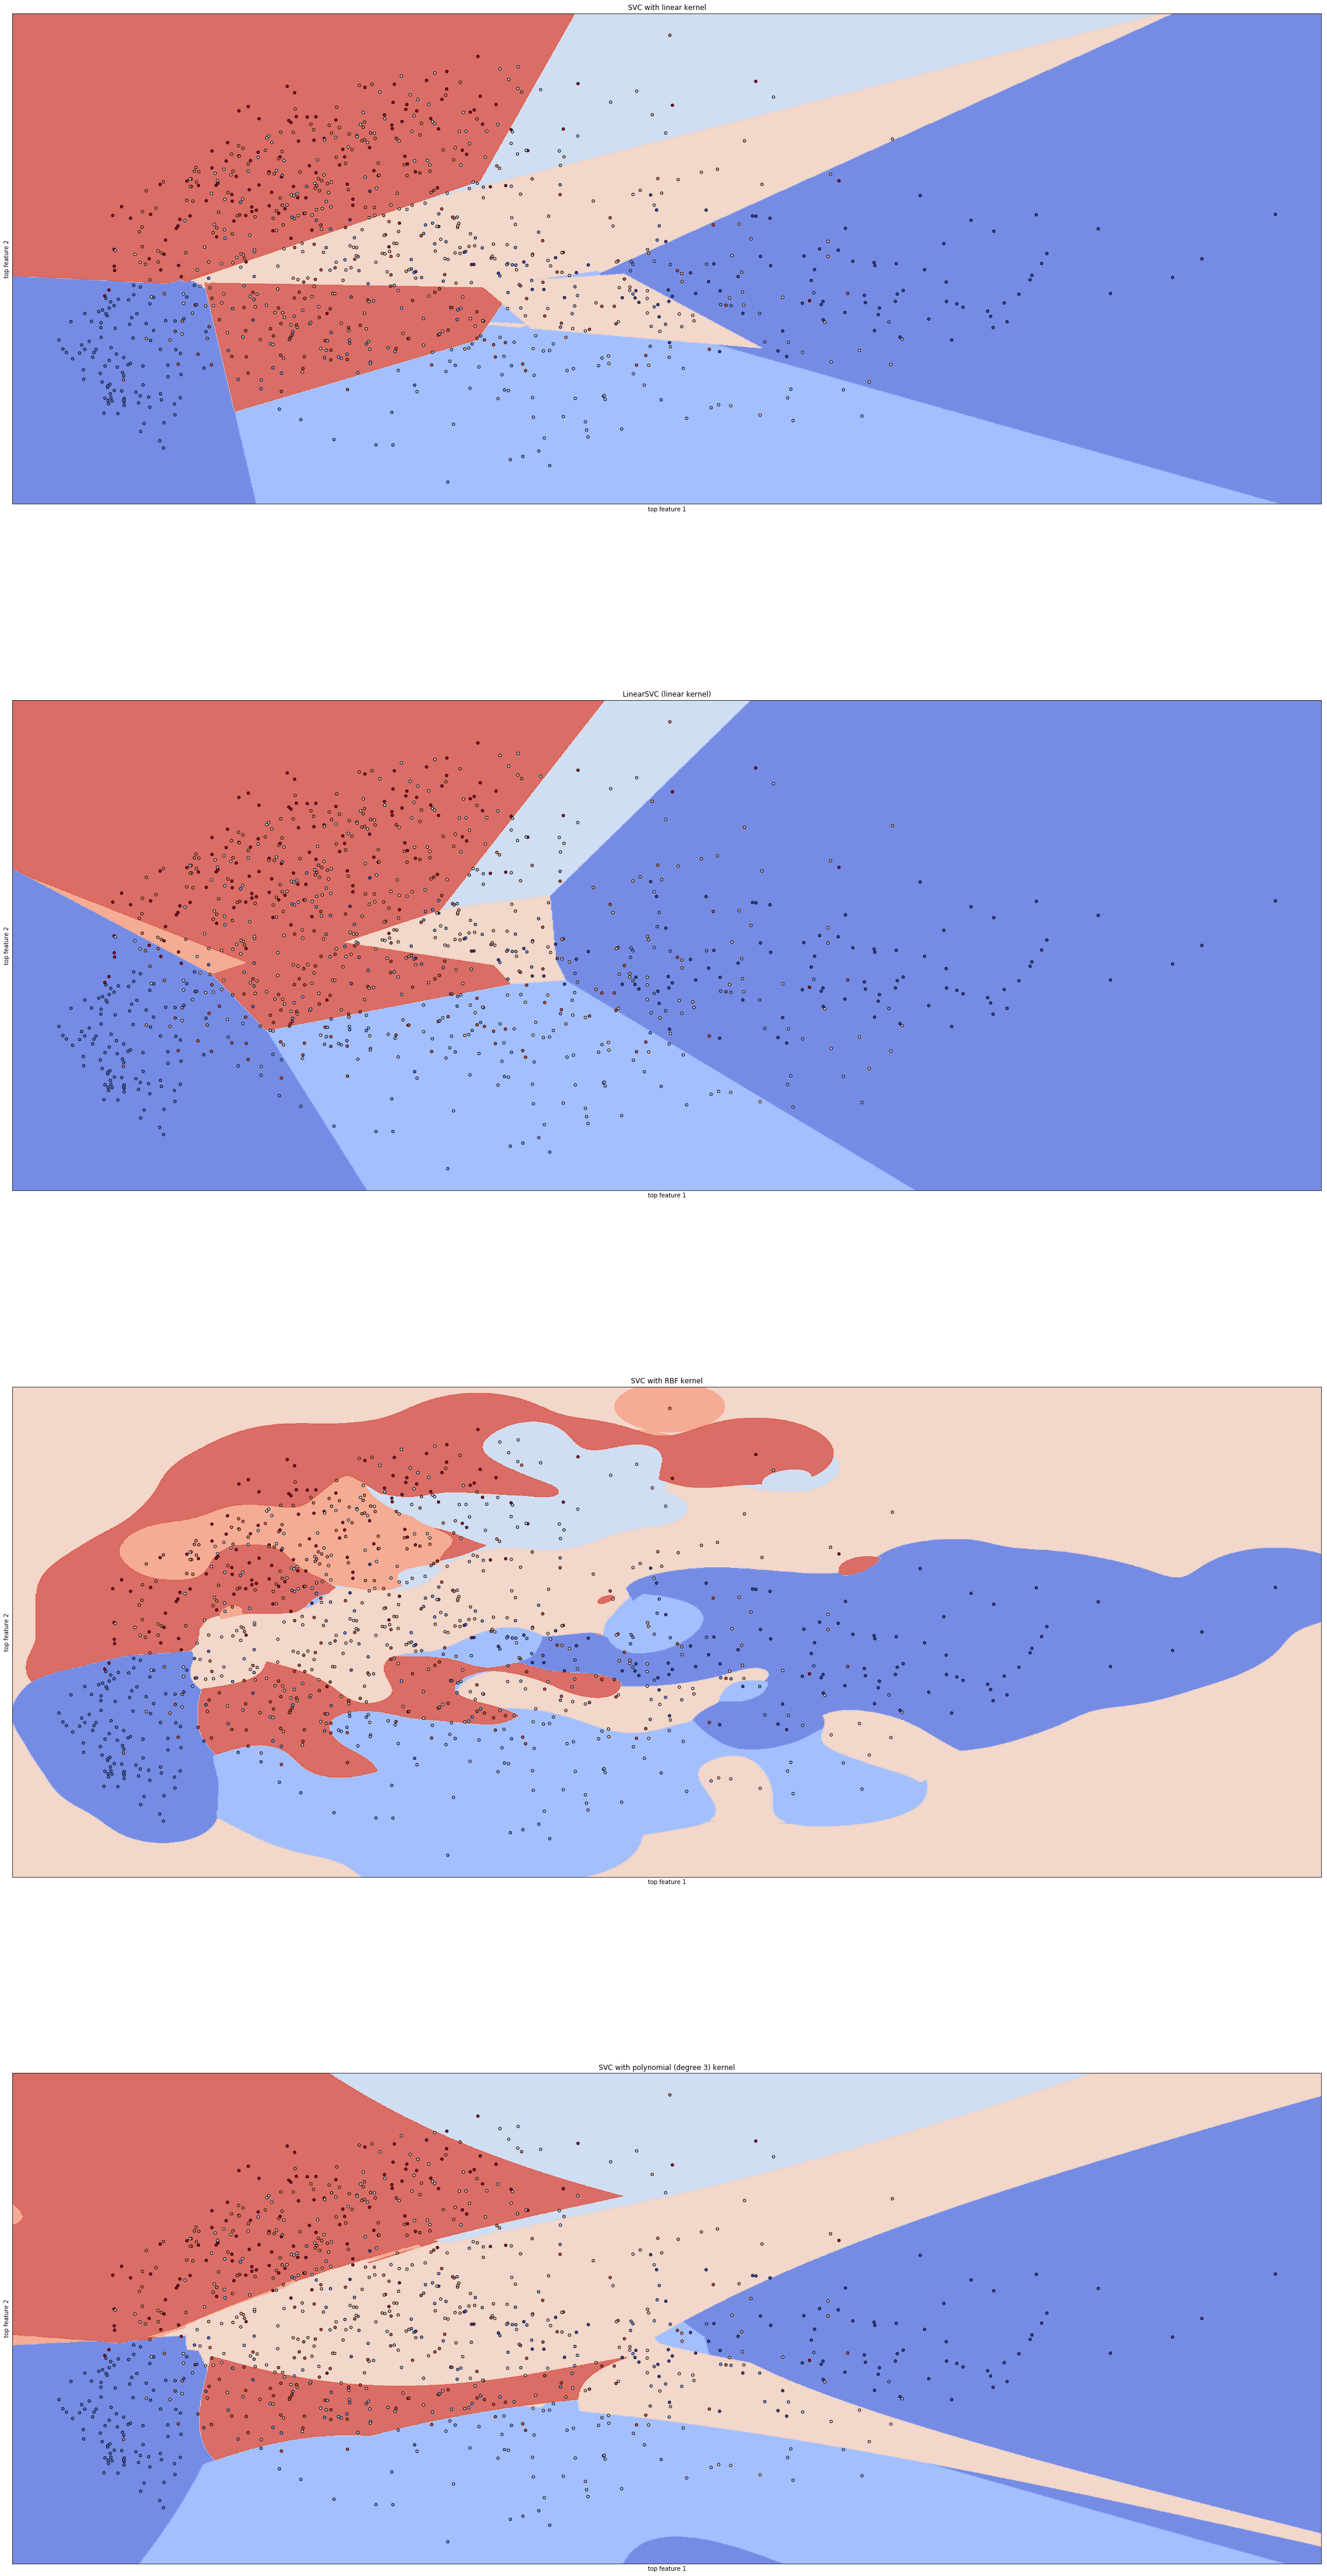

In [8]:

# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train
y = Y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(4, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('top feature 1')
    ax.set_ylabel('top feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    Y_predicted = clf.predict(X_test)
    print(accuracy_score(Y_test , Y_predicted))
plt.show()